# Data Analysis Project

*In this project we will do analysis of Airbnb datasets. To answer the business questions we have used CRISP-DM process.*<br>
*You can also refer to my [blog](https://medium.com/@sarafathima187/airbnb-data-analysis-57af362fb7dc) on this.*

### *Business Understanding*

*Seattle and Boston datasets are used.We will have a look at the following questions.*

1) *Predicting Boston prices.* <br>
2) *How much Seattle and Boston are earning in a certain time frame?* <br>
3) *Comparison of Seattle and Boston prices.* <br>
4) *Finding negative and positive reviews based on the comments.* <br>


#### Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import regex as re
from textblob import TextBlob 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')

### *Data Understanding*

*Loading **Seattle** dataset*

In [24]:
seattle_df=pd.read_csv('seattle.csv')


In [25]:
seattle_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [26]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


*Loading **Boston** dataset*

In [27]:
boston_df=pd.read_csv('boston.csv')
boston_df

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [28]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


*Loading **Boston_Review** dataset*

In [29]:
b_review=pd.read_csv("b_reviews.csv")
b_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


*Loading **Boston Listings** dataset*

In [30]:
bdata=pd.read_csv('listings.csv')
bdata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


In [31]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4903 non-null   int64  
 1   name                            4903 non-null   object 
 2   host_id                         4903 non-null   int64  
 3   host_name                       4903 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   4903 non-null   object 
 6   latitude                        4903 non-null   float64
 7   longitude                       4903 non-null   float64
 8   room_type                       4903 non-null   object 
 9   price                           4903 non-null   int64  
 10  minimum_nights                  4903 non-null   int64  
 11  number_of_reviews               4903 non-null   int64  
 12  last_review                     37

### *Prepare Data* 

In [32]:
seattle_df.price=seattle_df['price'].replace({'\$':''},regex=True)


In [33]:
seattle_df.price=pd.to_numeric(seattle_df['price'],errors='coerce')
seattle_df.price

0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64

In [34]:
seattle_df.isna().sum()/len(seattle_df)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.989014
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

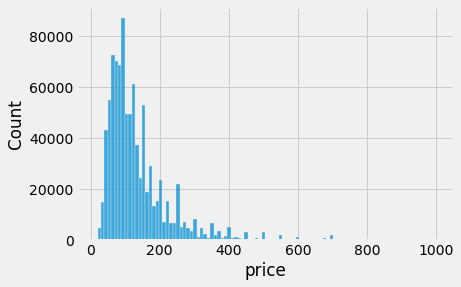

In [35]:
sns.histplot(seattle_df.price,bins=100)

In [36]:
seattle_df.describe()

,listing_id,price
count,1.393570e+06,933845.000000
mean,5.550111e+06,137.192227
std,2.962274e+06,101.243661
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,999.000000


In [37]:
#Filling null values with mode
seattle_df.price=seattle_df.price.fillna(seattle_df.price.mode()[0])

In [38]:
seattle_df.price

0           85.0
1           85.0
2          150.0
3          150.0
4          150.0
           ...  
1393565    150.0
1393566    150.0
1393567    150.0
1393568    150.0
1393569    150.0
Name: price, Length: 1393570, dtype: float64

In [39]:
seattle_df.available.replace(['t','f'],[1,0],inplace=True)

In [40]:
seattle_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,150.0
3,241032,2016-01-07,0,150.0
4,241032,2016-01-08,0,150.0


In [41]:
boston_df.price=boston_df['price'].replace({'\$':''},regex=True)

In [42]:
boston_df.price=pd.to_numeric(boston_df['price'],errors='coerce')
boston_df.price

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1308885   NaN
1308886   NaN
1308887   NaN
1308888   NaN
1308889   NaN
Name: price, Length: 1308890, dtype: float64

In [43]:
boston_df.isna().sum()/len(boston_df)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         51.067775
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

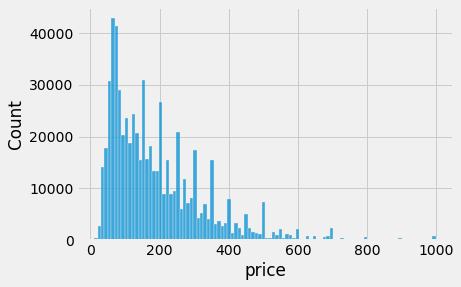

In [44]:
sns.histplot(boston_df.price,bins=100)

In [45]:
boston_df.price=boston_df.price.fillna(boston_df.price.mode()[0])

In [46]:
boston_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,150.0
1,12147973,2017-09-04,f,150.0
2,12147973,2017-09-03,f,150.0
3,12147973,2017-09-02,f,150.0
4,12147973,2017-09-01,f,150.0


#### *Boston_Review dataset cleaning comments column through Sentimental Analysis* 

In [47]:
b_review.comments

0         The apartment was as advertised and Frank was ...
1         It was a pleasure to stay at Frank's place. Th...
2         The apartment description is entirely faithful...
3         Thoroughly enjoyed my time at Frank's home. Ha...
4         Great value for the money! This location has e...
                                ...                        
228383    The view is worth it in itself. I'm so glad I ...
228384    Definitely one of the nicest Airbnbs I have st...
228385                                         Great place!
228386    The apartment is impeccable and communication ...
228387    Awesome airbnb, wouldn’t stay anywhere else. M...
Name: comments, Length: 228388, dtype: object

In [48]:

stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    '''Cleans the text by breaking text down into words,
       removing stop words like “if,” “but,” “or,” and so on,
       normalizing words by condensing all forms of a word into a single form,
       Returns simplified text. '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [49]:
b_review['comments']=b_review['comments'].apply(clean)


### *Modeling*

In [50]:
#Boston listings dataset
bdata.price=pd.to_numeric(bdata['price'],errors='coerce')
bdata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


In [6]:
bdata=bdata.drop(['last_review'],axis=1)

*Finding best model to predict prices*

In [7]:
from pycaret.regression import *
s = setup(data = bdata, target = 'price',session_id=123,data_split_shuffle=True)#fold_shuffle=False)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(4903, 17)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3432, 3811)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models(sort = 'RMSE')

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(include=None, fold=None, round=4, cross_validation=True, sort=RMSE, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, display=None, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=94)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:11:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.352300e+01,1.405720e+05,3.321676e+02,2.542000e-01,0.4817,3.121000e-01,42.653
lasso,Lasso Regression,1.329536e+02,1.493823e+05,3.495038e+02,1.267000e-01,0.6982,6.697000e-01,6.862
omp,Orthogonal Matching Pursuit,1.075635e+02,1.598239e+05,3.592223e+02,1.292000e-01,0.5853,3.741000e-01,1.949
en,Elastic Net,1.486954e+02,1.603859e+05,3.630243e+02,8.620000e-02,0.7606,8.782000e-01,6.747
dt,Decision Tree Regressor,1.110196e+02,1.585479e+05,3.630932e+02,-7.010000e-02,0.5883,3.996000e-01,0.880
llar,Lasso Least Angle Regression,1.519182e+02,1.642219e+05,3.683644e+02,5.320000e-02,0.7946,9.449000e-01,0.205
lr,Linear Regression,1.676291e+02,1.695902e+05,3.767169e+02,-4.400000e-03,0.8763,1.137000e+00,9.718
br,Bayesian Ridge,1.676291e+02,1.695902e+05,3.767169e+02,-4.400000e-03,0.8763,1.137000e+00,49.569
knn,K Neighbors Regressor,1.606939e+02,1.841241e+05,4.020800e+02,-2.986000e-01,0.8287,9.475000e-01,1.731
ridge,Ridge Regression,1.963530e+02,1.923496e+05,4.097106e+02,-3.191000e-01,0.9385,1.295500e+00,9.178


INFO:logs:Initializing Linear Regression
INFO:logs:Total runtime is 5.9771537780761716e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=KFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fc64d062f90>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Linear Regression Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with KFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-

In [8]:
model=create_model('et')

INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [9]:
tuned=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,137.6057,357443.3816,597.8657,0.1195,0.5866,0.5161
1,101.1200,38940.4507,197.3333,-0.2863,0.6575,0.6907
2,122.3194,86692.1351,294.4353,0.2247,0.6801,0.6479
3,146.5865,427434.3028,653.7846,0.1417,0.6104,0.5505
4,90.3071,25114.5393,158.4757,0.6968,0.5448,0.5899
5,133.5399,120948.7819,347.7769,0.4177,0.6681,0.5850
6,124.0982,131576.7467,362.7351,-0.1284,0.5884,0.5932
7,101.5291,35382.4028,188.1021,-0.3153,0.5877,0.6439
8,119.7700,89228.8804,298.7120,0.2319,0.5640,0.5065


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


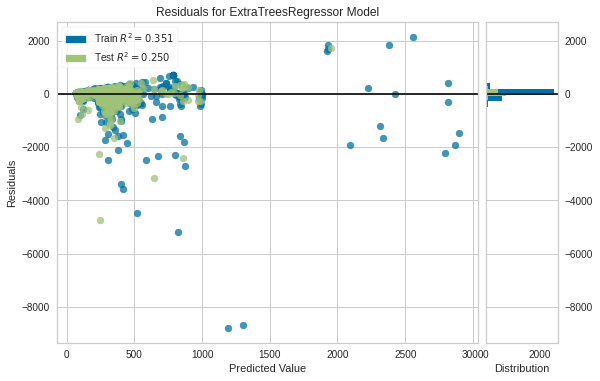

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [10]:
plot_model(tuned)

### *1)Predicting Boston Prices*

In [11]:
predict_model(tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,101.7477,55502.1938,235.589,0.2503,0.563,0.5827


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,license_Str-536217,license_not_available,license_str-413447,license_str-413946,license_str-414293,license_str-418154,license_str-446257,license_str-446652,price,Label
0,5.977841e+17,409684288.0,42.341511,-71.078537,14.0,0.0,1.758492,36.0,337.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393,462.724255
1,5.377238e+07,420731680.0,42.297119,-71.062050,1.0,19.0,3.390000,2.0,126.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232,305.865831
2,3.998468e+07,42947944.0,42.306389,-71.130257,300.0,5.0,0.170000,1.0,179.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185,375.072039
3,1.165670e+07,8898973.0,42.323780,-71.096481,30.0,232.0,3.060000,3.0,316.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,310.109307
4,6.034682e+17,359229632.0,42.372875,-71.077393,92.0,0.0,1.758492,102.0,365.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,213,251.405372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,2.147504e+06,10961675.0,42.373699,-71.173988,30.0,212.0,2.080000,2.0,94.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60,89.172212
1467,5.912519e+17,423270080.0,42.345375,-71.083244,1.0,2.0,2.000000,28.0,325.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1124,857.853309
1468,3.021937e+06,6030020.0,42.358540,-71.109550,14.0,10.0,0.100000,4.0,184.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,141,182.047514
1469,6.613267e+06,34607188.0,42.303600,-70.918381,7.0,0.0,1.758492,1.0,161.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,500,290.816265


In [12]:

save_model(tuned,'final_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False), model_name=final_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('impute

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=9,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

### *2)Seattle and Boston Earnings in given period*

In [51]:
seattle_df.date=pd.to_datetime(seattle_df['date']).dt.month_name()
seattle_df.head()

,listing_id,date,available,price
0,241032,January,1,85.0
1,241032,January,1,85.0
2,241032,January,0,150.0
3,241032,January,0,150.0
4,241032,January,0,150.0


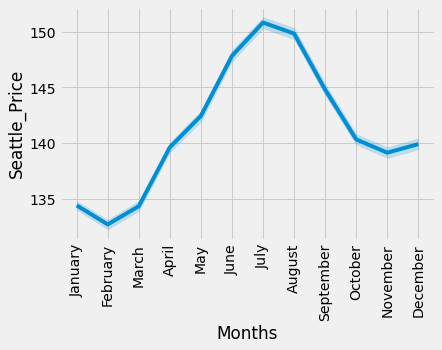

In [54]:
sns.lineplot(x='date',y='price',data=seattle_df)
plt.xlabel('Months')
plt.ylabel('Seattle_Price')
plt.xticks(rotation=90)
plt.show()

In [55]:
#Prices increase till July and then fall.

In [56]:
boston_df.date=pd.DatetimeIndex(boston_df['date']).month
boston_df.head()

,listing_id,date,available,price
0,12147973,9,f,150.0
1,12147973,9,f,150.0
2,12147973,9,f,150.0
3,12147973,9,f,150.0
4,12147973,9,f,150.0


Text(0, 0.5, 'Seattle_Price')

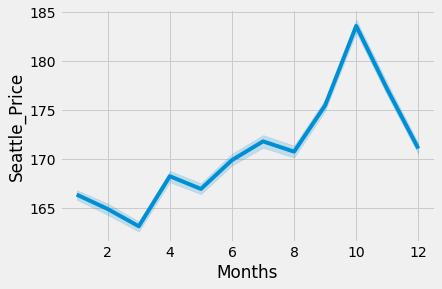

In [57]:
sns.lineplot(x='date',y='price',data=boston_df)
plt.xlabel('Months')
plt.ylabel('Seattle_Price')

In [58]:
#Prices decrease till March and go on increasing till october followed by drop.

### *3)Comparison of Seattle and Boston prices.*

In [59]:
# Visualisation of Seattle and Boston prices

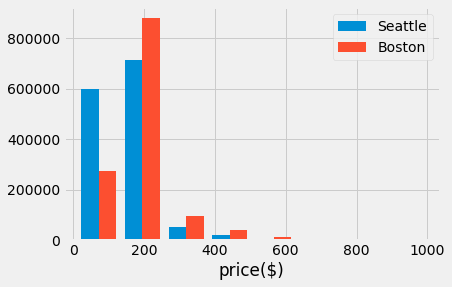

In [60]:
plt.hist([seattle_df['price'],boston_df['price']], label=['Seattle', 'Boston'],bins=8)
plt.legend(loc='upper right')
plt.xlabel('price($)')
plt.show()

In [61]:
#Seattle has cheaper rates . Boston has few high rates .

### *4)Calculating positive and negative scores of boston dataset based on comments*

In [62]:

sentiments = SentimentIntensityAnalyzer()
b_review["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in b_review['comments']]
b_review["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in b_review['comments']]
b_review["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in b_review['comments']]
b_review = b_review[["comments", "Positive", "Negative","Neutral"]]


In [63]:
x= sum(b_review["Positive"])
y = sum(b_review["Negative"])
z = sum(b_review["Neutral"])

def sentiment_score(a, b, c):
    '''Returns polarity based on score.'''
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
print(x,y,z)        

90522.71100000592 3449.101999999951 133901.15399998557


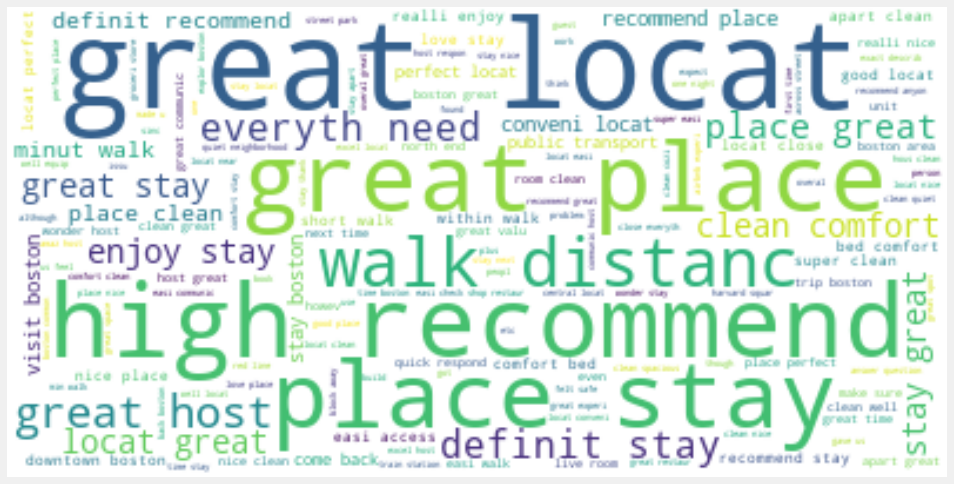

In [64]:
text = " ".join(i for i in  b_review['comments'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

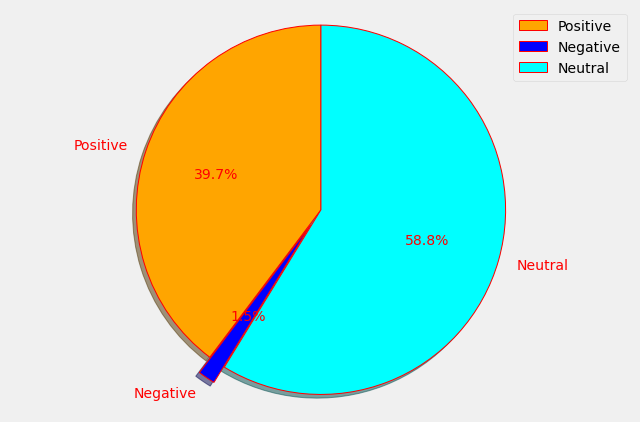

In [65]:
import matplotlib.pyplot as plt
sentiment=["Positive", "Negative","Neutral"]
sizes = [x,y,z]
explode = ( 0, 0.1, 0)
colors = ( "orange", "blue", "cyan")
wp = { 'linewidth' : 1, 'edgecolor' : "red" }
plt.subplots(figsize =(10, 7))
plt.pie(sizes, explode=explode,labels=sentiment, autopct='%1.1f%%', wedgeprops = wp,colors=colors,
    textprops = dict(color ="red"),startangle = 90,shadow=True)
plt.axis('equal')  
plt.legend(sentiment)
plt.show()

### *Evaluations*

*We are done with data analysis of Airbnb homes . Let’s summarise what we have done.* <br>
*Seattle has cheaper rates and variation is less compared to Boston.* <br>
*Boston reviews are mostly neutral followed by positive. One can prefer staying at Boston* <br>

